In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [3]:
df=pd.read_csv('diabetes_dataset.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
import warnings
import plotly.express as px
px_template="simple_white"

In [5]:
data=pd.read_csv('diabetes_dataset.csv',sep=",",encoding='utf-8')
data.shape

(253680, 22)

In [27]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} colums')

The dataset has 253680 rows and 22 colums


In [28]:
data.head()
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

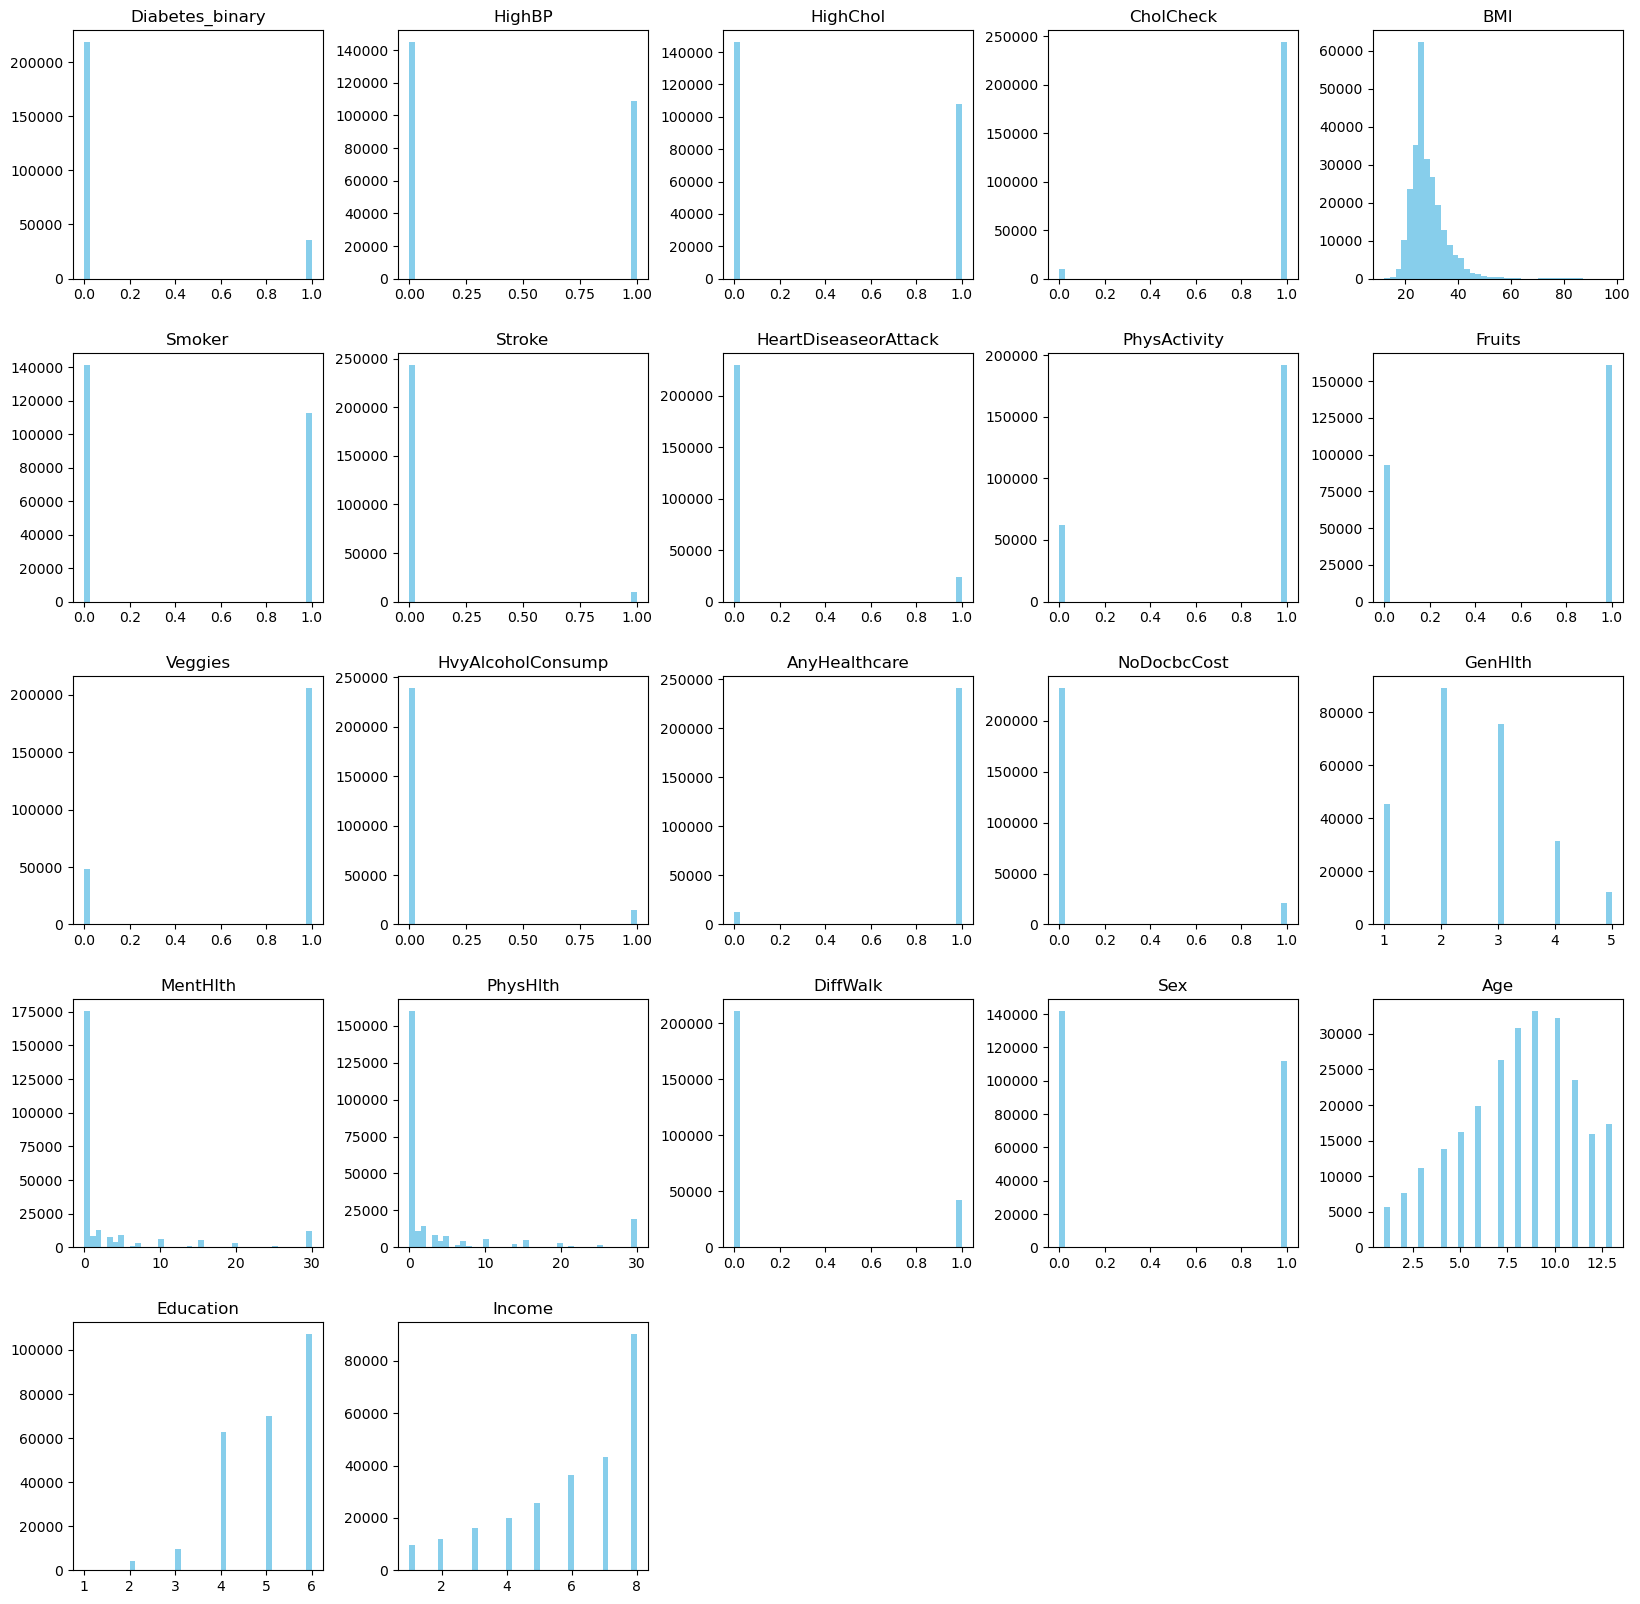

In [29]:
ax=data.hist(bins=40,grid=False,figsize=(20,20),color='skyblue')

Text(0, 0.5, 'BMI')

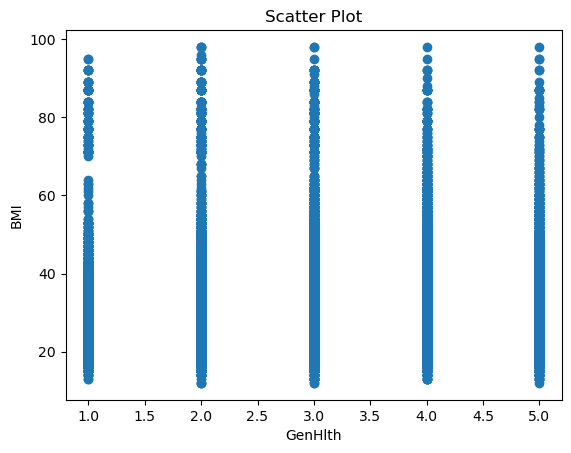

In [30]:
plt.scatter(data['GenHlth'],data['BMI'])
plt.title("Scatter Plot")
plt.xlabel('GenHlth')
plt.ylabel('BMI')

<Axes: xlabel='BMI', ylabel='Diabetes_binary'>

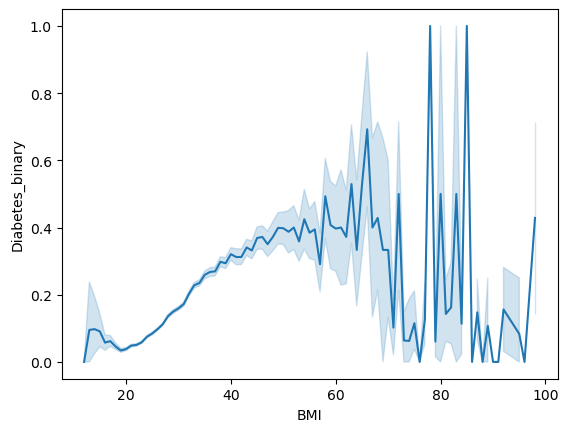

In [31]:
sns.lineplot(x='BMI',y='Diabetes_binary',data=data)

<Axes: title={'center': 'Correaltion with diabetes prediction'}>

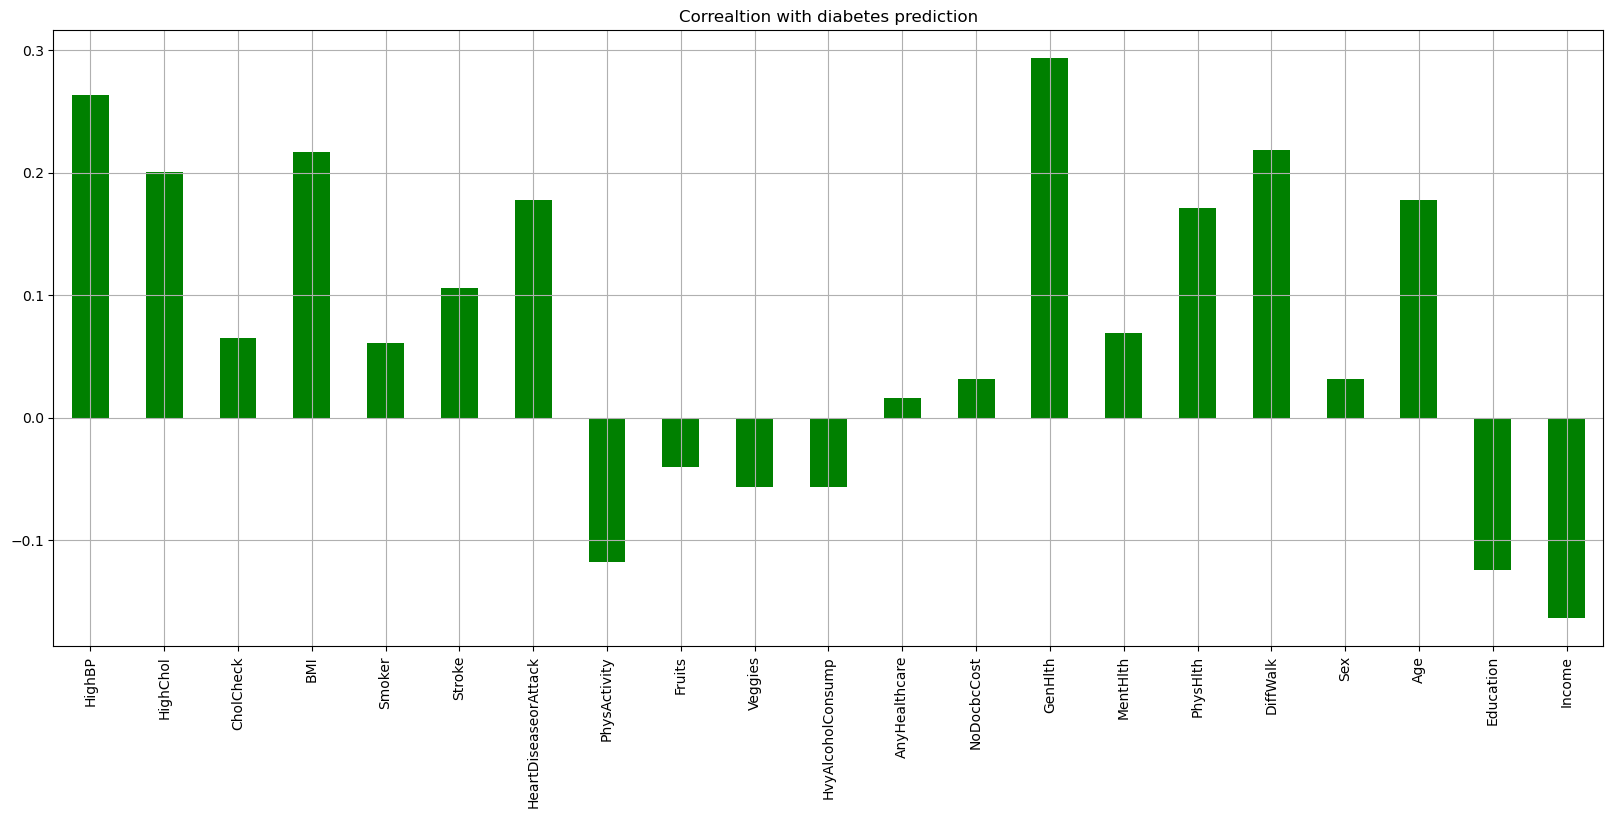

In [32]:
data.drop('Diabetes_binary',axis=1).corrwith(data.Diabetes_binary).plot(kind='bar',grid=True,figsize=(20,8),title='Correaltion with diabetes prediction',color='green')

([<matplotlib.patches.Wedge at 0x1cde8c20990>,
 [Text(-0.24332521880412825, 1.0727501283588472, 'non HighBP'),
  Text(0.24332521880412789, -1.0727501283588474, 'HighBP')],
 [Text(-0.13272284662043357, 0.5851364336502802, '57.10'),
  Text(0.13272284662043338, -0.5851364336502803, '42.90')])

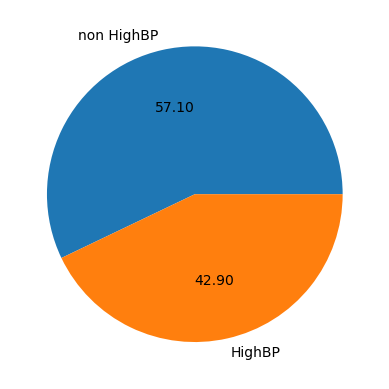

In [36]:
labels=['non HighBP','HighBP']
plt.pie(data['HighBP'].value_counts(),labels = labels, autopct='%0.2f')

Text(0, 0.5, 'Frequency')

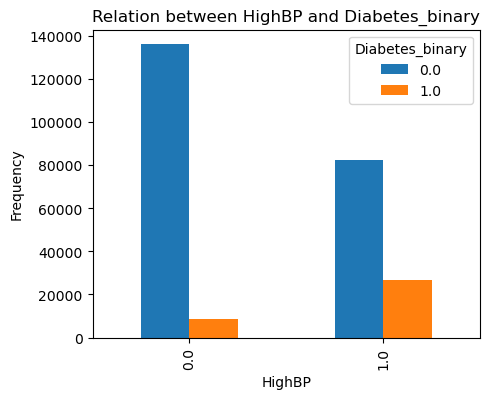

In [37]:
pd.crosstab(data.HighBP,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between HighBP and Diabetes_binary')
plt.xlabel('HighBP')
plt.ylabel('Frequency')


([<matplotlib.patches.Wedge at 0x1cde8ce1c90>,
 [Text(-0.259742719558564, 1.0688936895857892, 'non HighChol'),
  Text(0.2597426194815125, -1.0688937139046533, 'HighChol')],
 [Text(-0.14167784703194397, 0.5830329215922486, '57.59'),
  Text(0.14167779244446135, -0.5830329348570835, '42.41')])

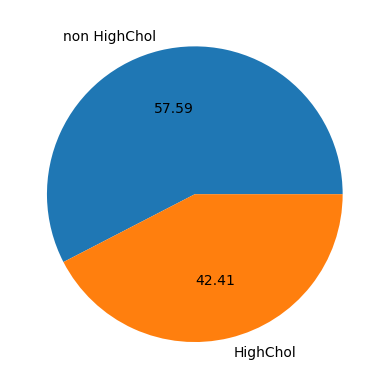

In [38]:
labels=['non HighChol','HighChol']
plt.pie(data['HighChol'].value_counts(),labels = labels, autopct='%0.2f')

Text(0, 0.5, 'Frequency')

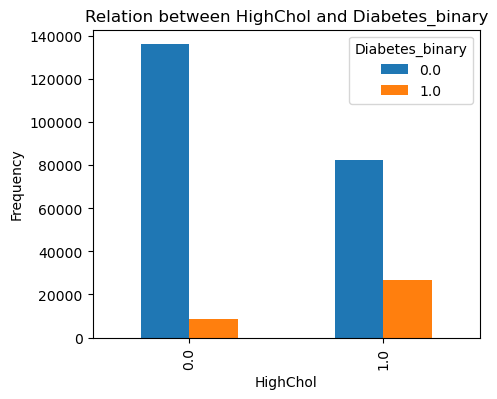

In [39]:
pd.crosstab(data.HighBP,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between HighChol and Diabetes_binary')
plt.xlabel('HighChol')
plt.ylabel('Frequency')

In [40]:
(data.groupby(['HighBP','HighChol'])['Diabetes_binary'].value_counts()/data.groupby(['HighBP','HighChol'])['Diabetes_binary'].count())*100

HighBP  HighChol  Diabetes_binary
0.0     0.0       0.0                95.811421
                  1.0                 4.188579
        1.0       0.0                89.580955
                  1.0                10.419045
1.0     0.0       0.0                83.266544
                  1.0                16.733456
        1.0       0.0                70.286112
                  1.0                29.713888
dtype: float64

C:\Users\tupka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Relation between HighBP, HighChol and Diabetes')

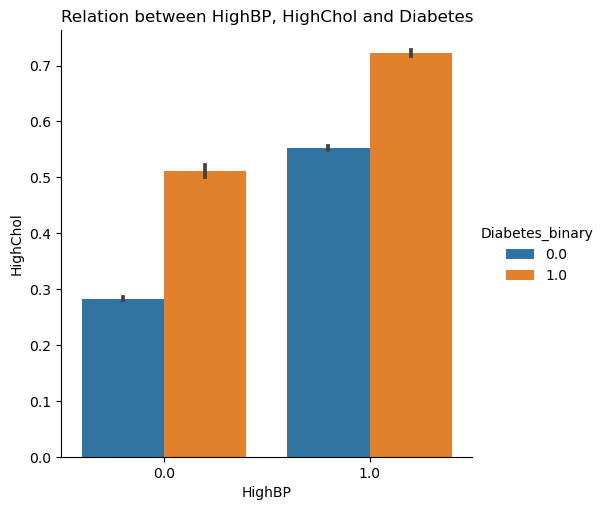

In [41]:
sns.catplot(x='HighBP',y='HighChol',data=data,hue="Diabetes_binary",kind='bar')
plt.title('Relation between HighBP, HighChol and Diabetes')

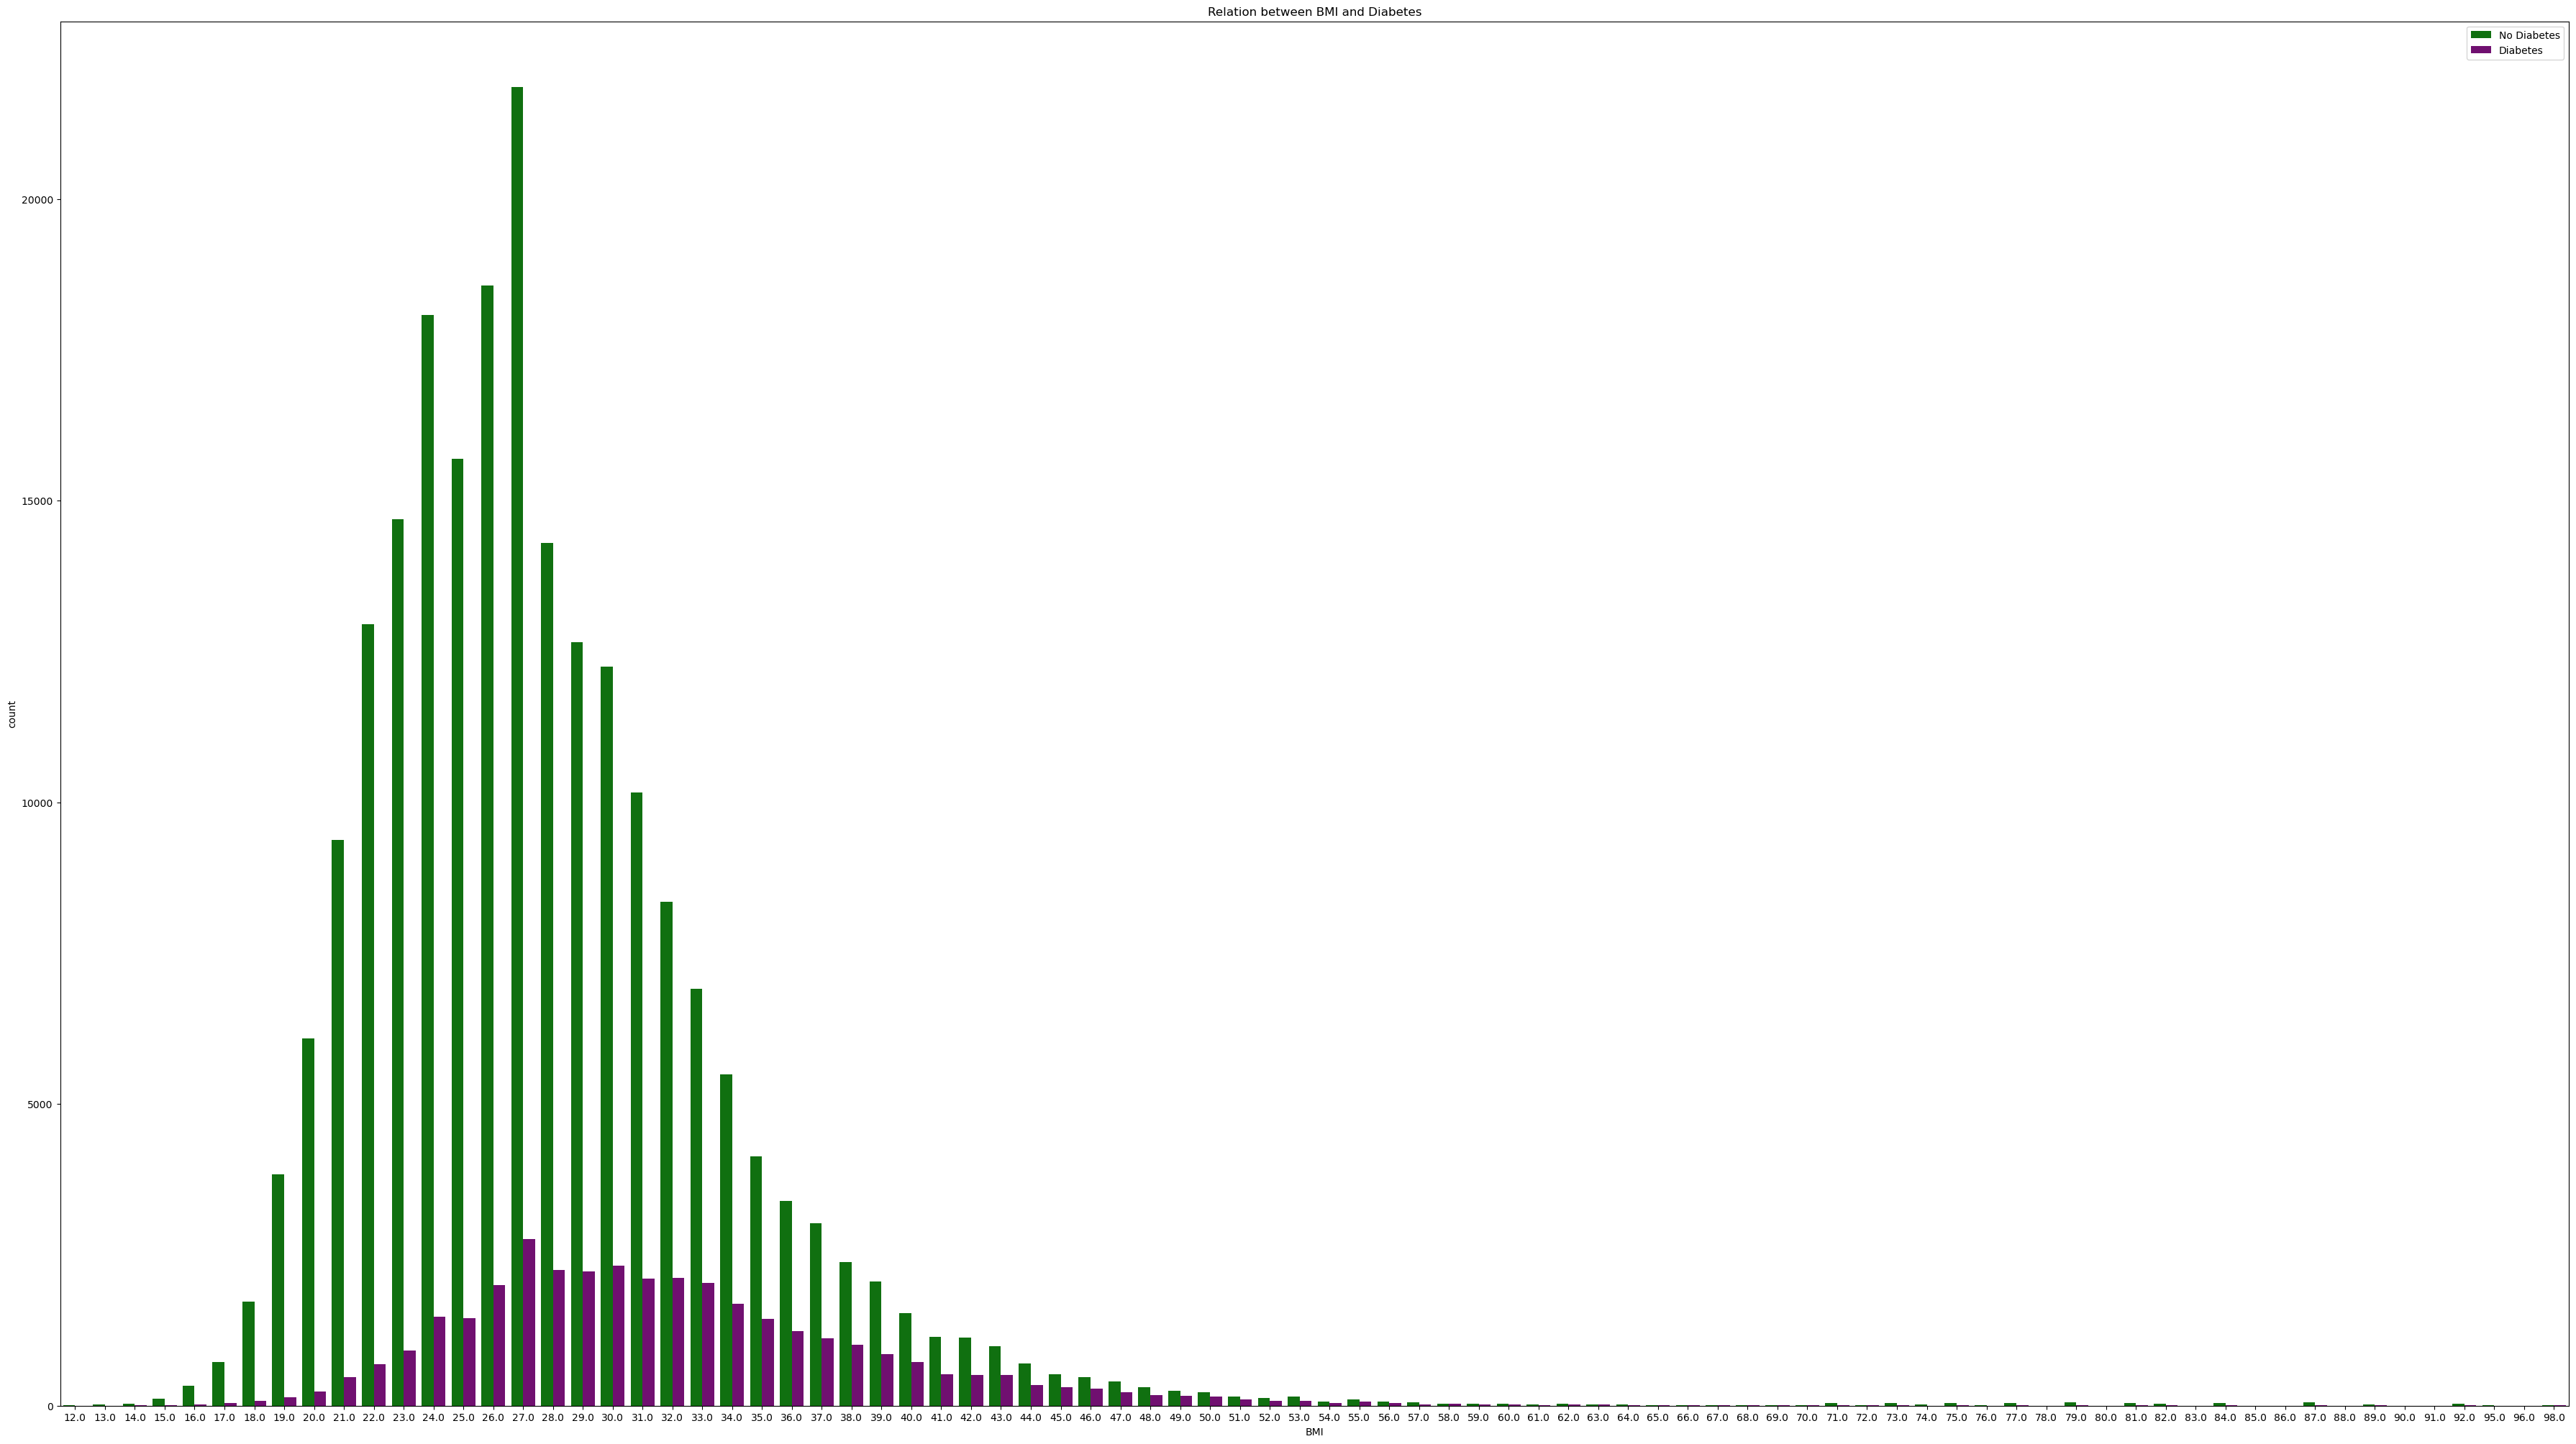

In [42]:
plt.figure(figsize=(45,25))
warnings.filterwarnings('ignore')
sns.countplot(data=df, x='BMI', hue='Diabetes_binary', palette=['green', 'purple'])
plt.title("Relation between BMI and Diabetes")
plt.legend(labels=['No Diabetes', 'Diabetes'])

([<matplotlib.patches.Wedge at 0x1cded35e990>,
 [Text(-0.19535353489495433, 1.082514201479152, 'non smoker'),
  Text(0.19535343354265902, -1.0825142197694653, 'smoker')],
 [Text(-0.10655647357906599, 0.590462291715901, '55.68'),
  Text(0.10655641829599581, -0.5904623016924355, '44.32')])

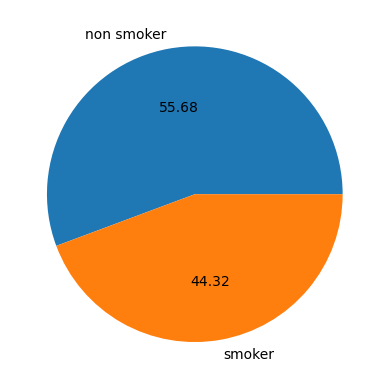

In [43]:
labels=['non smoker','smoker']
plt.pie(data['Smoker'].value_counts(),labels=labels,autopct='%0.2f')

In [44]:
pd.crosstab(data.Smoker,data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Smoker,,
0.0,124228,17029
1.0,94106,18317


Text(0, 0.5, 'Frequency')

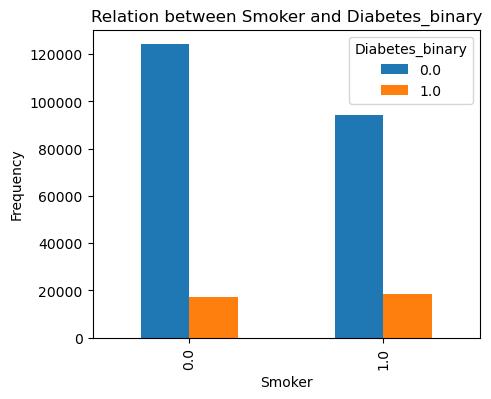

In [45]:
pd.crosstab(data.Smoker,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between Smoker and Diabetes_binary')
plt.xlabel('Smoker')
plt.ylabel('Frequency')

([<matplotlib.patches.Wedge at 0x1cded412810>,
 [Text(-1.0829015238677204, 0.19319495232787282, 'non HvyAlcoholConsump'),
  Text(1.082901508040527, -0.19319504104286053, 'HvyAlcoholConsump')],
 [Text(-0.590673558473302, 0.10537906490611243, '94.38'),
  Text(0.5906735498402874, -0.10537911329610573, '5.62')])

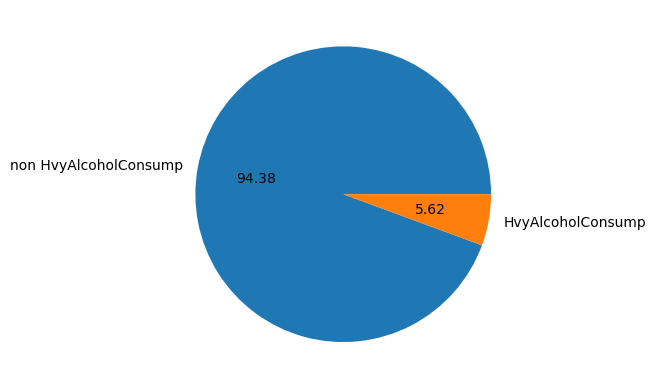

In [46]:
labels=['non HvyAlcoholConsump','HvyAlcoholConsump']
plt.pie(data['HvyAlcoholConsump'].value_counts(),labels=labels,autopct='%0.2f')

In [47]:
(data.groupby(['Smoker','HvyAlcoholConsump'])['Diabetes_binary'].value_counts()/data.groupby(['Smoker','HvyAlcoholConsump'])['Diabetes_binary'].count())*100

Smoker  HvyAlcoholConsump  Diabetes_binary
0.0     0.0                0.0                87.659612
                           1.0                12.340388
        1.0                0.0                95.730607
                           1.0                 4.269393
1.0     0.0                0.0                82.843460
                           1.0                17.156540
        1.0                0.0                93.320384
                           1.0                 6.679616
dtype: float64

Text(0.5, 1.0, 'Relation between Smoker, HvyAlcoholConsump and Diabetes')

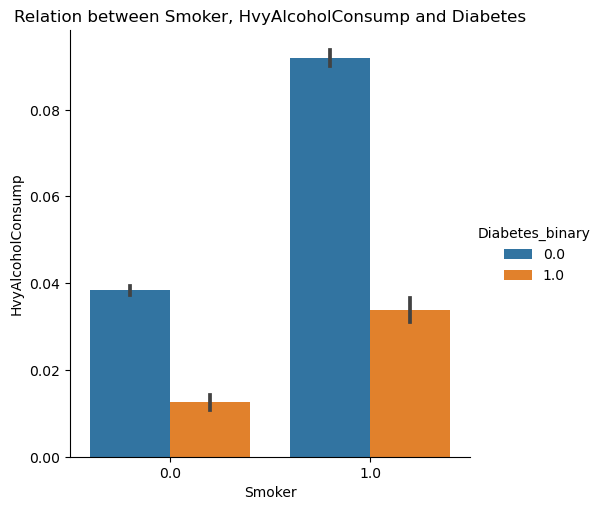

In [48]:
sns.catplot(x='Smoker', y='HvyAlcoholConsump', hue='Diabetes_binary', data=df, kind='bar')
plt.title('Relation between Smoker, HvyAlcoholConsump and Diabetes')

C:\Users\tupka\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Text(0.5, 1.0, 'Relation between Stroke, HeartDiseaseorAttack and Diabetes')

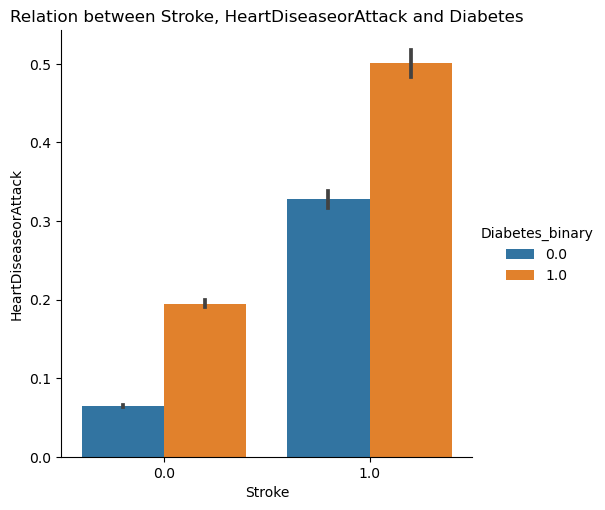

In [9]:
sns.catplot(x='Stroke',y='HeartDiseaseorAttack',data=data,hue="Diabetes_binary",kind='bar')
plt.title('Relation between Stroke, HeartDiseaseorAttack and Diabetes')

([<matplotlib.patches.Wedge at 0x1cdf14a3890>,
 [Text(-0.793642061018332, 0.7616641510420287, 'non PhysActivity'),
  Text(0.7936420966744032, -0.7616641138889618, 'PhysActivity')],
 [Text(-0.4328956696463629, 0.41545317329565196, '75.65'),
  Text(0.432895689095129, -0.41545315303034275, '24.35')])

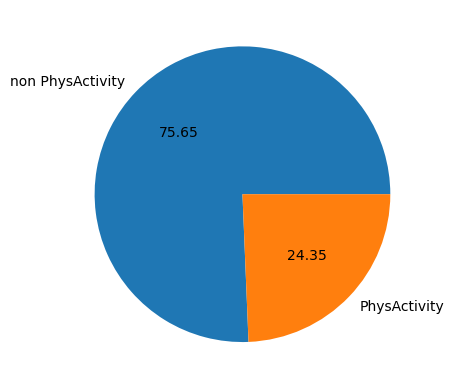

In [50]:
labels=['non PhysActivity','PhysActivity']
plt.pie(data['PhysActivity'].value_counts(),labels=labels,autopct='%0.2f')

In [51]:
pd.crosstab(data.PhysActivity,data.Diabetes_binary)

Diabetes_binary,0.0,1.0
PhysActivity,,
0.0,48701,13059
1.0,169633,22287


Text(0, 0.5, 'Frequency')

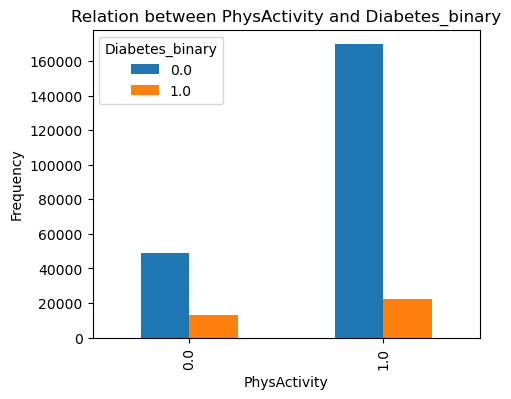

In [52]:
pd.crosstab(data.PhysActivity,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between PhysActivity and Diabetes_binary')
plt.xlabel('PhysActivity')
plt.ylabel('Frequency')

In [53]:
pd.crosstab(data.Fruits,data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Fruits,,
0.0,78129,14653
1.0,140205,20693


Text(0, 0.5, 'Frequency')

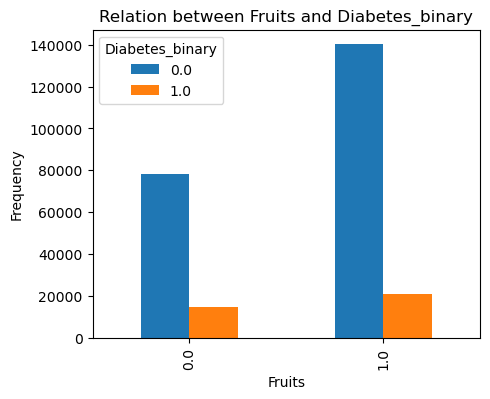

In [54]:
pd.crosstab(data.Fruits,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.title('Relation between Fruits and Diabetes_binary')
plt.xlabel('Fruits')
plt.ylabel('Frequency')

In [55]:
pd.crosstab(data.Veggies,data.Diabetes_binary)

Diabetes_binary,0.0,1.0
Veggies,,
0.0,39229,8610
1.0,179105,26736


Text(0, 0.5, 'Frequency')

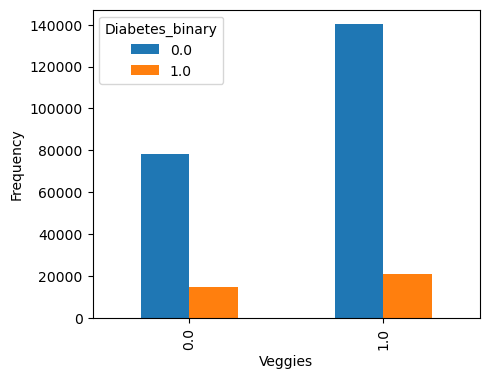

In [56]:
pd.crosstab(data.Fruits,data.Diabetes_binary).plot(kind='bar',figsize=(5,4))
plt.xlabel('Veggies')
plt.ylabel('Frequency')

In [57]:
pd.crosstab(data.MentHlth,data.Diabetes_binary).T

MentHlth,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Diabetes_binary,,,,,,,,,,,,,,,,,,,,,
0.0,152277,7726,11546,6457,3300,7807,824,2695,529,78,...,179,52,30,27,915,38,67,270,128,9320
1.0,23403,812,1508,924,489,1223,164,405,110,13,...,48,11,8,6,273,7,12,57,30,2768


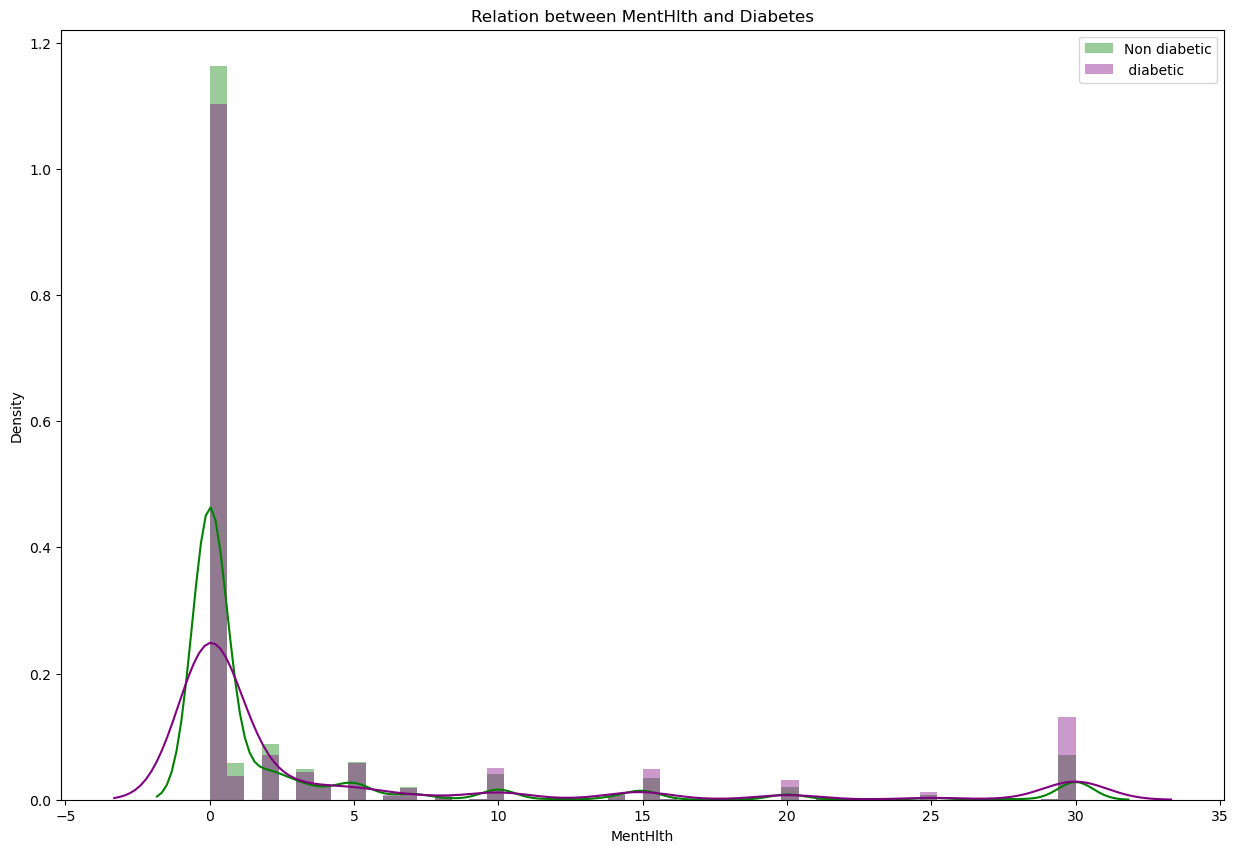

In [58]:
plt.figure(figsize=(15,10))
warnings.filterwarnings('ignore')
sns.distplot(data.MentHlth[data.Diabetes_binary==0],color='green',label='Non diabetic')
sns.distplot(data.MentHlth[data.Diabetes_binary==1],color='purple',label=' diabetic')
plt.title('Relation between MentHlth and Diabetes')
plt.legend()